# Lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq
from scipy.signal import sawtooth
import pandas as pd
from scipy.fft import ifft

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## 🆘✅(a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

## 🆘✅(b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

In [2]:
def P(alpha,r):
  return np.exp(-2*alpha*r)

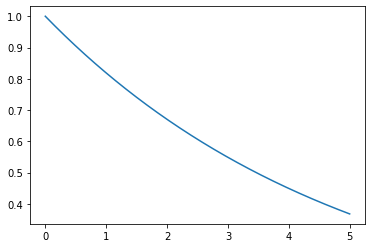

In [ ]:
x = np.linspace(0, 5, 1000)
plt.plot(x, P(.1, x))

In [3]:
def w(alpha,x1st,x2nd):
    return P(alpha,x2nd)/P(alpha,x1st)

In [4]:
def Q(R,x1st,x2nd):
    
    return (1+x2nd)/(2+x1st)


In [5]:

def Metropolice(alpha,n,x1st, x2nd,R):
    points=[x1st]

    for j in range(n):
      a = w(alpha,x1st,x2nd)* Q(R,x1st,x2nd)/Q(R,x2nd,x1st)
      rand= np.random.rand()

      if a >=1 or a>=rand :
        points.append(x2nd)
        newrand=  np.random.rand()*R 
        while newrand==0:
          newrand= np.random.rand()*R
        x1st, x2nd= x2nd, newrand

      else :
        points.append(x1st)
        x1st, x2nd= x1st,x1st

    return points
        
      
      
   
      
      
   

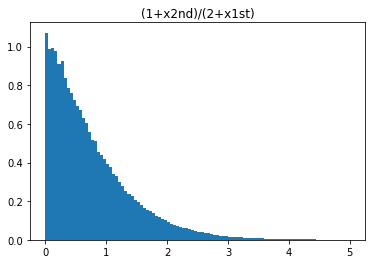

In [ ]:
points=Metropolice(1,1000000,.2,.3,5)
plt.title('(1+x2nd)/(2+x1st)')
plt.hist(points, bins=100, density=True);

In [9]:
def Q(R,x1st,x2nd):
   
    the= ( x1st/R )*np.pi
    return np.sin(the)+ x2nd


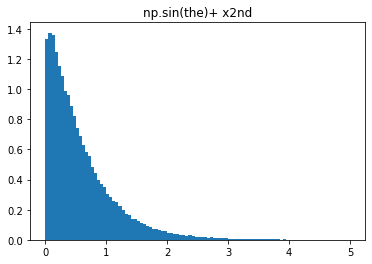

In [ ]:
points=Metropolice(1,1000000,.2,.3,5)
plt.title('np.sin(the)+ x2nd')
plt.hist(points, bins=100, density=True);

In [ ]:
def Q(R,x1st,x2nd):
  return x1st**-3 + x2nd

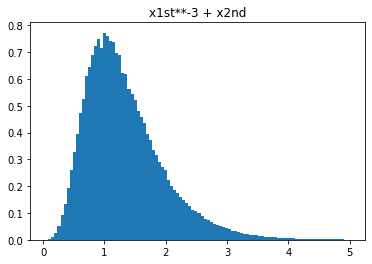

In [ ]:
points=Metropolice(1,1000000,.2,.3,5)
plt.title('x1st**-3 + x2nd')
plt.hist(points, bins=100, density=True);

## ❗(c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

In [6]:
from scipy import integrate

- with Sin= Q

In [15]:
def mean_sigma2(la):
  
  e= lambda xraw: ( -.5*(la**2-2*la/xraw)-1/xraw ) * P(la,xraw)
  e2= lambda xraw: ( (-.5*(la**2-2*la/xraw)-1/xraw) **2 ) * P(2*la,xraw)

  mean=  integrate.quad(e,-np.inf,np.inf)[0]
  var=  integrate.quad(e2,-np.inf,np.inf)[0] - mean**2

  return [mean , var ]

In [11]:
la= np.arange(0,3,.01)
n=100
resp=np.zeros(n+1)
for i in la:
  resp= np.vstack((resp,Metropolice(2,n,-2,-1,i)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sin
  after removing the cwd from sys.path.


In [16]:
mean=[mean_sigma2(i)[0] for i in la]
var= [mean_sigma2(i)[1] for i in la]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


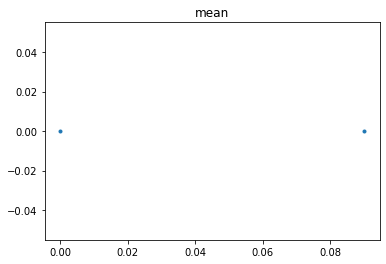

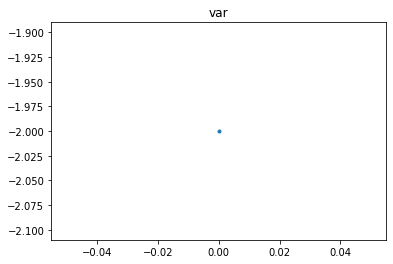

In [18]:

plt.title('mean')
plt.plot(la,mean,'.');
plt.show()

plt.title('var')
# این شکلش درنمیاد نمیدونم چرا!
plt.plot(la,var,'.')

# Q2: FFT (warm up)



## ✅(a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [ ]:
from scipy.fft import fft, fftshift, fftfreq

In [ ]:
n = 1000
ti = 0    #s
tf = 20   #s

T,rate= np.linspace(0,stop=21,num=n,retstep=1)
x= [ 2*np.sin(t)+np.sin(10*t) for t in T ]
y= fft(x)
K=fftfreq(n,rate)

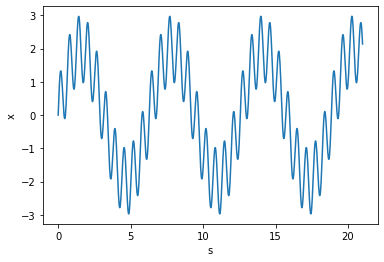

In [ ]:
plt.xlabel('s')
plt.ylabel('x')
plt.plot(T,x);



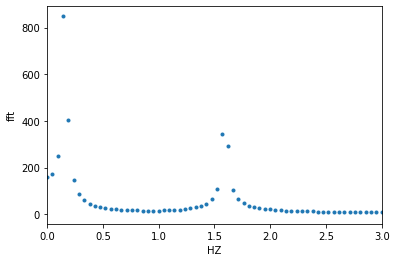

In [ ]:
plt.xlabel('HZ')
plt.ylabel('fft')
plt.xlim(0,3)
plt.plot(K,abs(y),'.');

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

In [ ]:
1/K[np.argmax(abs(y))]

7.007007007007009

In [ ]:
# Answer here
خب کد داره فرکانس رو میده. وقتی برعکسش میکنیم درست میشه

## ✅(b)

Calculate and plot Fourier transform of sawtooth function.

In [ ]:
from scipy.signal import sawtooth

In [ ]:
n = 1000
ti = 0    #s
tf = 20   #s

T,rate= np.linspace(0,stop=21,num=n,retstep=1)
x= sawtooth(T)
y= fft(x)
K=fftfreq(n,rate)



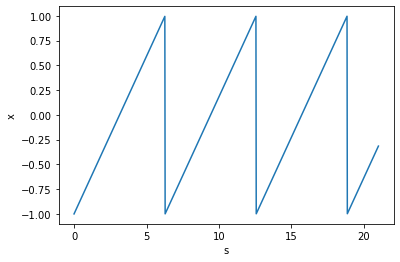

In [ ]:
plt.xlabel('s')
plt.ylabel('x')
plt.plot(T,x);



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


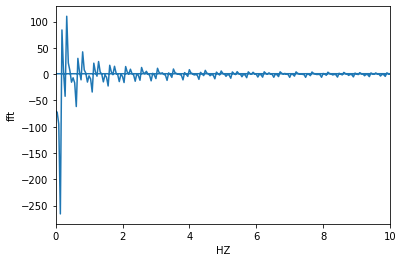

In [ ]:
plt.xlabel('HZ')
plt.ylabel('fft')
plt.xlim(0,10)
plt.plot(K,y);

# Q3: Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [ ]:
import pandas as pd

In [ ]:
solar=pd.read_csv('https://raw.githubusercontent.com/SBUDataAnalysis/hw8-mrsheivari/main/Sunspots.csv',cache_dates=1).drop(columns='Num')

In [ ]:
solar

,Date,Monthly
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


In [ ]:
solar['Date']=pd.to_datetime(solar['Date'])

In [ ]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3265 non-null   datetime64[ns]
 1   Monthly  3265 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.1 KB


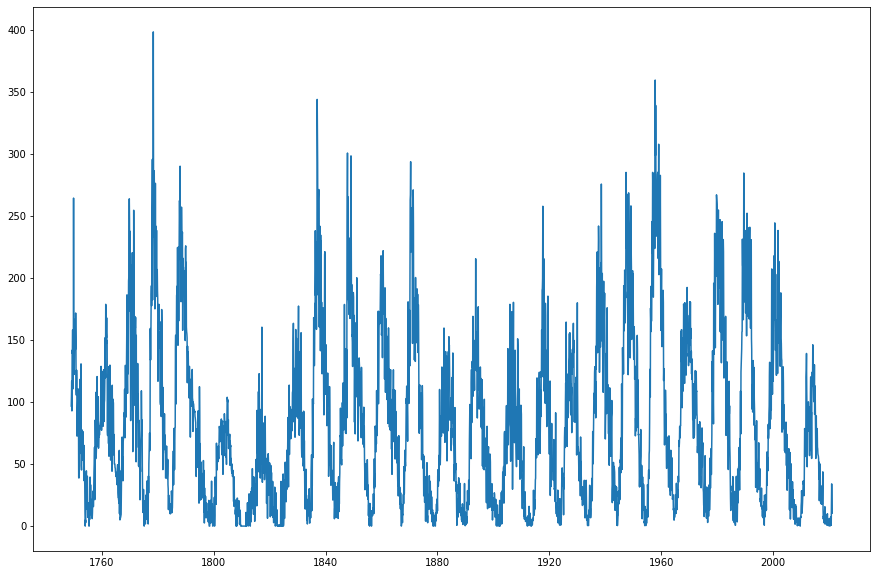

In [ ]:
plt.figure( figsize=(15,10) )
plt.plot(solar['Date'],solar['Monthly'],)

## ✅(a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

In [ ]:
solar['Monthly']

0        96.7
1       104.3
2       116.7
3        92.8
4       141.7
        ...  
3260      0.6
3261     14.4
3262     34.0
3263     21.8
3264     10.4
Name: Monthly, Length: 3265, dtype: float64

In [ ]:
sun= solar['Monthly'].values
sun=sun-np.mean(sun)
sun= sun/np.std(sun)

F= fft(sun)
K= fftfreq(len(sun),1)

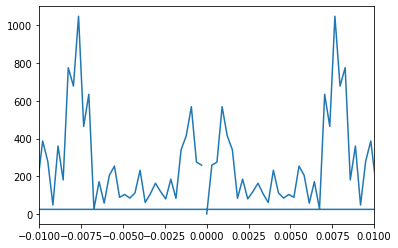

In [ ]:
plt.xlim(-.01,.01)
plt.plot(K,abs(F))

In [ ]:
print('the cycle is: %s monthes' %(1/K[np.argmax(abs(F))]))

the cycle is: 130.6 monthes


## ✅(b)
First do an inverse Fourier analysis to confirm that you get back the same data.

In [ ]:
from scipy.fft import ifft

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


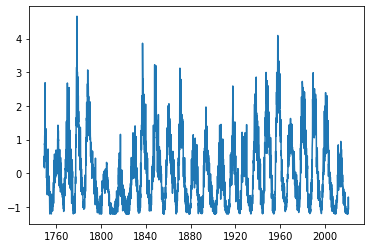

In [ ]:
plt.plot(solar['Date'],ifft(F))
plt.show()


## ✅(c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

Why does the plot look different? And what's the difference?

In [ ]:
Fprim= pd.DataFrame(abs(F),columns=['absF'])
Fprim

,absF
0,7.727152e-14
1,2.587787e+02
2,2.747077e+02
3,5.685587e+02
4,4.140573e+02
...,...
3260,3.404611e+02
3261,4.140573e+02
3262,5.685587e+02
3263,2.747077e+02


In [ ]:
large=list(Fprim.nlargest(10,['absF']).index)
solar2=solar.drop(index=large)

F2=pd.DataFrame(F,columns=['F2'])
Fprim2=F2.drop(index=large)


In [ ]:
invF= ifft(Fprim2.F2.values)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


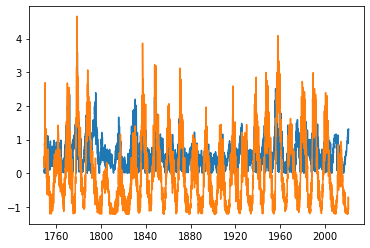

In [ ]:
plt.plot(solar2['Date'],abs(invF))
plt.plot(solar['Date'],ifft(F))

## ✅Explain here ...
وقتی مدهای بزرگ رو برمیداریم و حذف میکنیم، یعنی داریم اون سیکل کلی دیتا رو حذف میکنیم و فقط اکسپونشیال های کوچیک میمونن. پس در کل تبدیل به نوسانات و تغییرات باقی مانده میشه. همونطور که میبینیم نارنجی اصلی است و ابی حذف شده. نه تنها نشون میده که داده های دارای بزرگترین ضریب حذف شدند، بلکه تغییر کلی سیکل رو هم تقریبا نشون میده.

# ✅Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

In [ ]:
pcf=pd.read_csv('https://raw.githubusercontent.com/SBUDataAnalysis/hw8-zahrasadat9/main/2pcf.txt',names=['pcf'])
pcf

,pcf
0,0.0000
1,-0.5803
2,-0.9645
3,-0.7912
4,-0.6154
...,...
99995,1.8084
99996,1.8084
99997,2.2739
99998,1.4093


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcfa201c50>]],
      dtype=object)

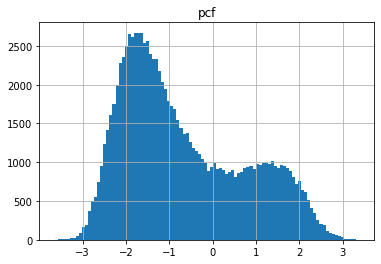

In [ ]:
pcf.hist(bins=100)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

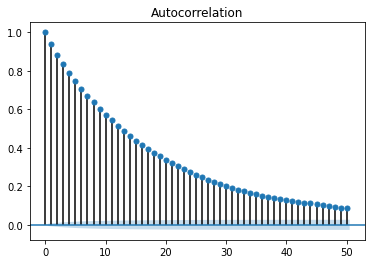

In [ ]:
plot_acf(pcf['pcf']);
plt.show()

استاندار کردم تا یکم واضح تر دیده بشه

In [ ]:
sun= pcf.pcf.values
sun=sun-np.mean(sun)
sun= sun/np.std(sun)

autocorrelation=np.correlate(sun, sun, mode="full") 
autocorrelation = autocorrelation[autocorrelation.size//2:]

In [ ]:
F=fft( autocorrelation )
K=fftfreq(len(pcf),1)

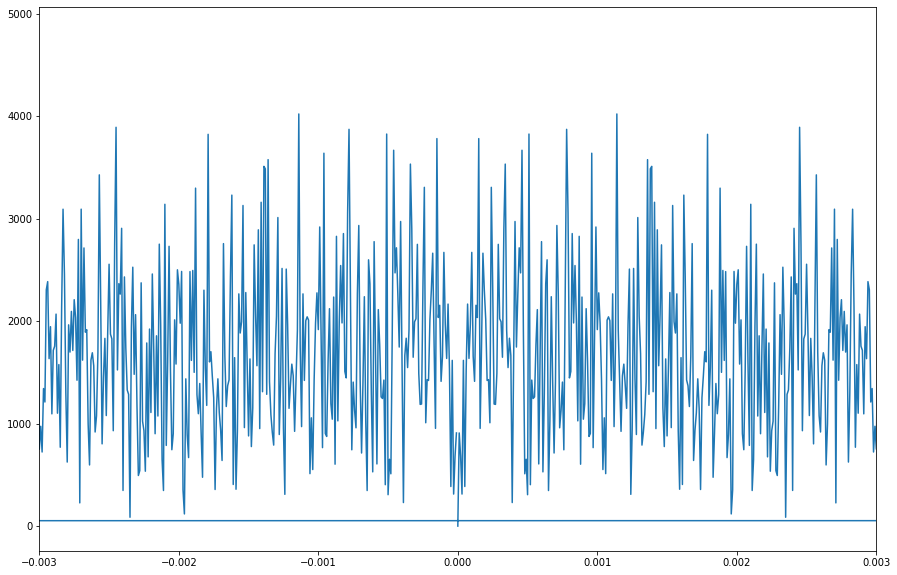

In [ ]:
plt.figure( figsize=(15,10) )
plt.xlim(-.003,.003)
plt.plot(K,abs(F))

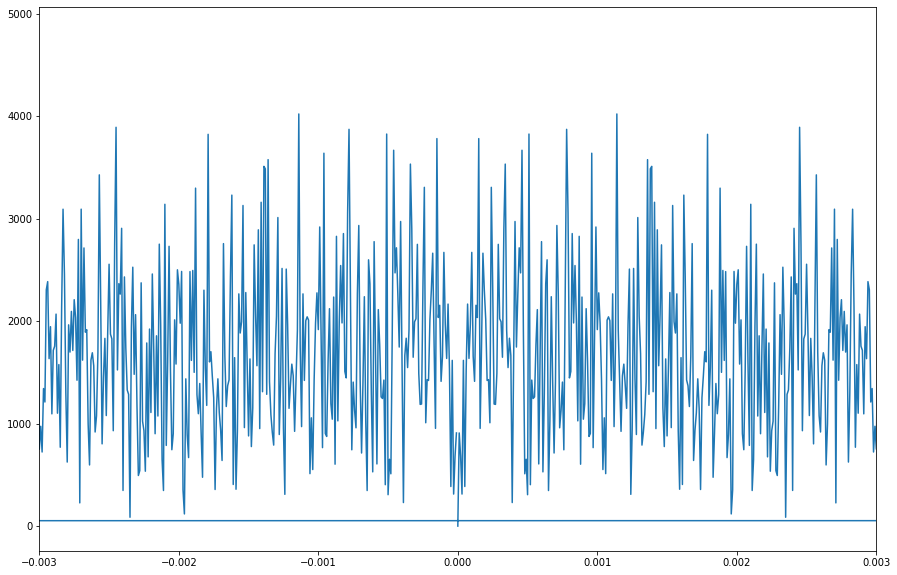

In [ ]:
F= fft(sun)
plt.figure( figsize=(15,10) )
plt.xlim(-.003,.003)
plt.plot(K,abs(F))

In [ ]:
# Your answers here

# #🔃 Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

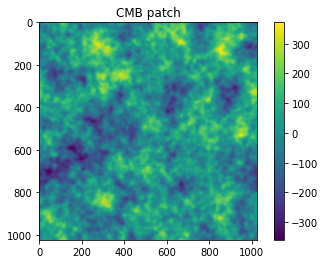

In [ ]:
...

In [ ]:
# Your answers here